# TMDB_5000 data analysis

In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
# 更改字体
plt.rcParams['font.sans-serif'] = ['SimHei']
#读取人员列表信息及电影列表信息
credits = pd.read_csv('tmdb_5000_credits.csv', encoding='utf_8')
movies = pd.read_csv('tmdb_5000_movies.csv', encoding='utf_8')

In [3]:
#####数据清洗#####
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
#credits.head(10)

In [5]:
#movies.head()

In [6]:
# 两个数据表中title列重复，删除credits中的title列
del credits['title']

In [7]:
# 合并两个表，以id和movie_id相同合并
movie_merge = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='left')

In [8]:
# 删除无关的列
movie_merge.drop(['original_title', 'original_language', 'spoken_languages', 'status', 'movie_id', 'budget', 
                 'production_companies', 'revenue'], axis=1, inplace=True)
movie_merge.head()

,genres,homepage,id,keywords,overview,popularity,production_countries,release_date,runtime,tagline,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
#查看数据信息，查看那个字段数据量小于4803
movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 600.4+ KB


In [10]:
#查看具有缺失值的列
movie_merge.isnull().any()

genres                  False
homepage                 True
id                      False
keywords                False
overview                 True
popularity              False
production_countries    False
release_date             True
runtime                  True
tagline                  True
title                   False
vote_average            False
vote_count              False
cast                    False
crew                    False
dtype: bool

In [11]:
# 找出上映日期为空的电影
movie_merge.loc[movie_merge['release_date'].isnull()==True]

,genres,homepage,id,keywords,overview,popularity,production_countries,release_date,runtime,tagline,title,vote_average,vote_count,cast,crew
4553,[],NaN,380097,[],1971 post civil rights San Francisco seemed li...,0.0,[],NaN,0.0,NaN,America Is Still the Place,0.0,0,[],[]


In [12]:
# 网上搜索该电影的上映日期，填充其值
movie_merge['release_date'] = movie_merge['release_date'].fillna('2014-06-01')

In [13]:
# 找出runtime的两条缺失数据，并搜索填充
movie_merge.loc[movie_merge['runtime'].isnull()==True]

,genres,homepage,id,keywords,overview,popularity,production_countries,release_date,runtime,tagline,title,vote_average,vote_count,cast,crew
2656,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",NaN,0.738646,"[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,NaN,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",NaN,0.050625,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,NaN,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [14]:
movie_merge['runtime'] = movie_merge['runtime'].fillna(94, limit=1)#限制每次只填补一个值
movie_merge['runtime'] = movie_merge['runtime'].fillna(240, limit=1)

In [15]:
# 将release_date转为日期类型
movie_merge['release_date'] = pd.to_datetime(movie_merge['release_date'],format='%Y-%m-%d',
                                            errors='coerce').dt.year

In [16]:
# 填充缺失值，字符串null
movie_merge['homepage'] = movie_merge['homepage'].fillna('null')
movie_merge['overview'] = movie_merge['overview'].fillna('null')
movie_merge['tagline'] = movie_merge['tagline'].fillna('null')

In [17]:
### json数据转换为字符串
# movie_merge的json数据解析
import json
json_cols = ['genres', 'keywords', 'production_countries', 'cast', 'crew']
# 应用json.loads解码转换为字典列表，json.dumps编码
for i in json_cols:
    movie_merge[i] = movie_merge[i].map(json.loads)
# 将字典内的name取出，以，分隔
def getname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return ','.join(list)
# 对json_cols中前三个执行函数
for i in json_cols[0:3]:
    movie_merge[i] = movie_merge[i].map(getname)

In [18]:
# 提取四名主演和导演
# 定义提取主演的函数
def get_char(x):
    list = []
    for i in x:
        list.append(i['character'])
    return ','.join(list[0:4])
# 对cast执行函数
movie_merge['cast'] = movie_merge['cast'].map(get_char)

In [19]:
# 定义提取导演的函数
def get_director(x):
    list = []
    for i in x:
        if i['job']=='Director':
            list.append(i['name'])
    return ','.join(list)
# 对cast执行函数
movie_merge['crew'] = movie_merge['crew'].map(get_director)

In [20]:
# 重命名列
rename_col = {'release_date': 'year', 'cast': 'actor', 'crew': 'director'}
movie_merge.rename(columns=rename_col, inplace=True)
movie_merge.head(3)

,genres,homepage,id,keywords,overview,popularity,production_countries,year,runtime,tagline,title,vote_average,vote_count,actor,director
0,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...","In the 22nd century, a paraplegic Marine is di...",150.437577,"United States of America,United Kingdom",2009,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron
1,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...","Captain Barbossa, long believed to be dead, ha...",139.082615,United States of America,2007,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski
2,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",A cryptic message from Bond’s past sends him o...,107.376788,"United Kingdom,United States of America",2015,148.0,A Plan No One Escapes,Spectre,6.3,4466,"James Bond,Blofeld,Madeleine,M",Sam Mendes


In [21]:
merge_df = movie_merge.copy()

In [22]:
#####数据可视化#####
# 哪种类型电影数量最多，及电影类型随时间的变化趋势
# 提取所有的电影类型，genres数据以，分隔
genres_set = set()
for x in merge_df['genres']:
    genres_set.update(x.split(','))
genres_set

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [23]:
genres_set.discard('') #删除‘’字符

In [24]:
# 对各种电影类型进行one-hot编码,如果一个值中包含指定内容，则编码为1，否则编码为0
genres_df = pd.DataFrame()
for gen in genres_set:
    genres_df[gen] = merge_df['genres'].str.contains(gen).map(lambda x: 1 if x else 0)

In [25]:
# genres_df

In [26]:
genres_df['year']=merge_df['year']

In [27]:
# 将genres_df按year分组，计算每组之和。
genre_year = genres_df.groupby('year').sum()
genre_year.head(5)

,Action,Crime,Thriller,Music,Fantasy,TV Movie,Animation,War,History,Western,Horror,Comedy,Mystery,Romance,Foreign,Adventure,Documentary,Family,Science Fiction,Drama
year,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1925,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1927,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1929,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2
1930,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [28]:
#计算每个类型的电影总数目，并降序排列
genresum_year = genre_year.sum().sort_values(ascending=False)
genresum_year

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

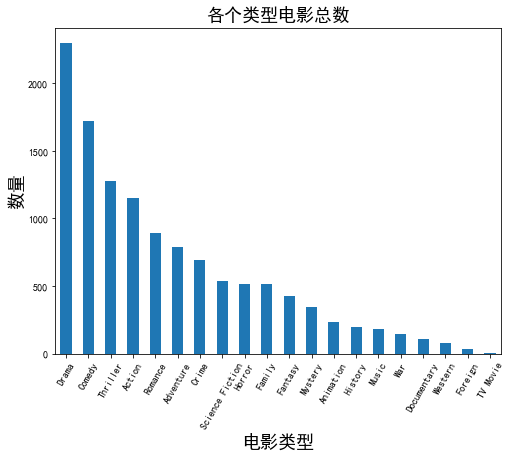

In [29]:
# 可视化每个类型电影总数
fig = plt.figure(figsize=(8, 6)) # 设置画图框尺寸
ax = plt.subplot(1, 1, 1)# 设置图的位置
ax = genresum_year.plot.bar() #画直方图
plt.xticks(rotation=60) # 设置图形格式
plt.title('各个类型电影总数', fontsize=18)
plt.xlabel('电影类型', fontsize=18)
plt.ylabel('数量', fontsize=18)
plt.show()
fig.savefig('film genre number.png', dpi=300)

In [30]:
genre_year60 = genre_year.loc[1960:, :]
genre_year60.head(5)

,Action,Crime,Thriller,Music,Fantasy,TV Movie,Animation,War,History,Western,Horror,Comedy,Mystery,Romance,Foreign,Adventure,Documentary,Family,Science Fiction,Drama
year,,,,,,,,,,,,,,,,,,,,
1960,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,3
1961,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,5
1962,2,1,1,0,0,0,0,2,2,1,1,0,0,1,0,2,0,0,1,4
1963,4,1,2,0,0,0,0,1,4,1,0,3,0,3,0,5,0,0,0,4
1964,2,0,2,2,1,0,0,2,1,1,0,3,0,2,0,1,0,2,0,6


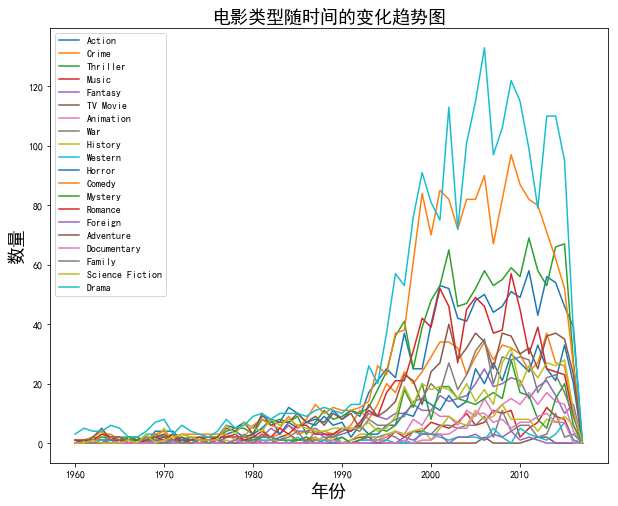

In [31]:
# 电影类型随时间的变化趋势图
fig = plt.figure(figsize=(10, 8)) # 设置画图框尺寸
ax1 = plt.subplot(1, 1, 1)# 设置图的位置
plt.plot(genre_year60) #画折线图
# 设置图形格式
plt.title('电影类型随时间的变化趋势图', fontsize=18)
plt.xlabel('年份', fontsize=18)
plt.ylabel('数量', fontsize=18)
plt.xticks(range(1960, 2017, 10))# 设置x轴的刻度
plt.legend(genre_year60)
plt.show()
fig.savefig('film genre by year.png', dpi=600)

In [32]:
genres_df['id'] = merge_df['id']
genres_df['title'] = merge_df['title']
genres_df['vote_average'] = merge_df['vote_average']
genres_df['vote_count'] = merge_df['vote_count']
genres_df.head(2)

,Action,Crime,Thriller,Music,Fantasy,TV Movie,Animation,War,History,Western,...,Adventure,Documentary,Family,Science Fiction,Drama,year,id,title,vote_average,vote_count
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,2009,19995,Avatar,7.2,11800
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,2007,285,Pirates of the Caribbean: At World's End,6.9,4500


In [33]:
# 删除评价人数小于100的电影
genres_df = genres_df[genres_df['vote_count'] > 100]

In [34]:
# genres_df

In [35]:
# # for line in locals()['In']:
# #     print(line)

In [36]:
drama = genres_df[genres_df.Drama==1][['id', 'title', 'vote_average']]
drama['tagline'] = merge_df['tagline']
drama['overview'] = merge_df['overview']
drama.sort_values(by='vote_average', ascending=False).head(20)

,id,title,vote_average,tagline,overview
1881,278,The Shawshank Redemption,8.5,Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...
3337,238,The Godfather,8.4,An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o..."
662,550,Fight Club,8.3,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...
1818,424,Schindler's List,8.3,"Whoever saves one life, saves the world entire.",The true story of how businessman Oskar Schind...
2731,240,The Godfather: Part II,8.3,"I don't feel I have to wipe everybody out, Tom...",In the continuing saga of the Corleone crime f...
3865,244786,Whiplash,8.3,The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ..."
3719,510,One Flew Over the Cuckoo's Nest,8.2,"If he's crazy, what does that make you?",While serving time for insanity at a state men...
2170,539,Psycho,8.2,The master of suspense moves his cameras into ...,When larcenous real estate clerk Marion Crane ...
4535,346,Seven Samurai,8.2,The Mighty Warriors Who Became the Seven Natio...,A samurai answers a village's request for prot...
1663,311,Once Upon a Time in America,8.2,"Crime, passion and lust for power - Sergio Leo...",A former Prohibition-era Jewish gangster retur...


In [37]:
# 按评分推荐电影，取前20个
votehot_df = pd.DataFrame()
votehot_df['id'] = genres_df['id']
votehot_df['title'] = genres_df['title']
votehot_df['year'] = genres_df['year']
votehot_df['vote_average'] = genres_df['vote_average']
votehot_df.sort_values(by='vote_average', ascending=False).head(20)

,id,title,year,vote_average
1881,278,The Shawshank Redemption,1994,8.5
3337,238,The Godfather,1972,8.4
1818,424,Schindler's List,1993,8.3
3232,680,Pulp Fiction,1994,8.3
2294,129,Spirited Away,2001,8.3
2731,240,The Godfather: Part II,1974,8.3
3865,244786,Whiplash,2014,8.3
662,550,Fight Club,1999,8.3
3719,510,One Flew Over the Cuckoo's Nest,1975,8.2
809,13,Forrest Gump,1994,8.2


In [38]:
# 按热门polularity推荐电影，取前20个
popular_df = pd.DataFrame()
popular_df['id'] = merge_df['id']
popular_df['title'] = merge_df['title']
popular_df['year'] = merge_df['year']
popular_df['polularity'] = merge_df['popularity']
popular_df.sort_values(by='polularity', ascending=False).head(20)

,id,title,year,polularity
546,211672,Minions,2015,875.581305
95,157336,Interstellar,2014,724.247784
788,293660,Deadpool,2016,514.569956
94,118340,Guardians of the Galaxy,2014,481.098624
127,76341,Mad Max: Fury Road,2015,434.278564
28,135397,Jurassic World,2015,418.708552
199,22,Pirates of the Caribbean: The Curse of the Bla...,2003,271.972889
82,119450,Dawn of the Planet of the Apes,2014,243.791743
200,131631,The Hunger Games: Mockingjay - Part 1,2014,206.227151
88,177572,Big Hero 6,2014,203.734590


In [39]:
merge_df.head(5)

,genres,homepage,id,keywords,overview,popularity,production_countries,year,runtime,tagline,title,vote_average,vote_count,actor,director
0,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...","In the 22nd century, a paraplegic Marine is di...",150.437577,"United States of America,United Kingdom",2009,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"Jake Sully,Neytiri,Dr. Grace Augustine,Col. Qu...",James Cameron
1,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...","Captain Barbossa, long believed to be dead, ha...",139.082615,United States of America,2007,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Captain Jack Sparrow,Will Turner,Elizabeth Swa...",Gore Verbinski
2,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",A cryptic message from Bond’s past sends him o...,107.376788,"United Kingdom,United States of America",2015,148.0,A Plan No One Escapes,Spectre,6.3,4466,"James Bond,Blofeld,Madeleine,M",Sam Mendes
3,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",Following the death of District Attorney Harve...,112.312950,United States of America,2012,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"Bruce Wayne / Batman,Alfred Pennyworth,James G...",Christopher Nolan
4,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...","John Carter is a war-weary, former military ca...",43.926995,United States of America,2012,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"John Carter,Dejah Thoris,Sola,Tars Tarkas",Andrew Stanton


In [40]:
### 哪个国家电影数量最多，及每个国家电影随时间的变化趋势 ###
# 提取所有的国家，production_countries数据以，分隔
countries_set = set()
for x in merge_df['production_countries']:
    countries_set.update(x.split(','))
countries_set

{'',
 'Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guadaloupe',
 'Guyana',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Monaco',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia',
 'Serbia and Montenegro',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Sou

In [41]:
countries_set.discard('') #删除‘’字符
# 对各个国家进行one-hot编码,如果一个值中包含指定内容，则编码为1，否则编码为0
countries_df = pd.DataFrame()
for coun in countries_set:
    countries_df[coun] = merge_df['production_countries'].str.contains(coun).map(lambda x: 1 if x else 0)
countries_df['year']=merge_df['year']
# 将countries_df按year分组，计算每组之和。
countries_year = countries_df.groupby('year').sum()
#计算每个国家的电影总数目，并降序排列
counsum_year = countries_year.sum().sort_values(ascending=False)

In [42]:
#筛选出电影数目小于10的国家
counsum_year=counsum_year[counsum_year>10]
counsum_year.head()

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
dtype: int64

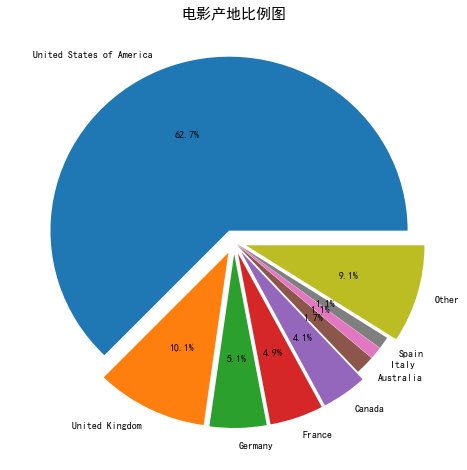

In [43]:
#可视化每个国家的电影数目比例
#计算每个国家的比例
co = counsum_year/counsum_year.sum()
# 所占比例大于等于0.04时，往外高出一点，比例小于0.01时归为其他
others = 0.01
col = co[co >= others]
col['Other'] = co[co < others].sum()
explode = (col >= 0.04)/20 + 0.02
# 设置pie参数
col.plot.pie(autopct='%1.1f%%', figsize=(8, 8), explode=explode, label='')
plt.title('电影产地比例图', fontsize=15)
plt.show()

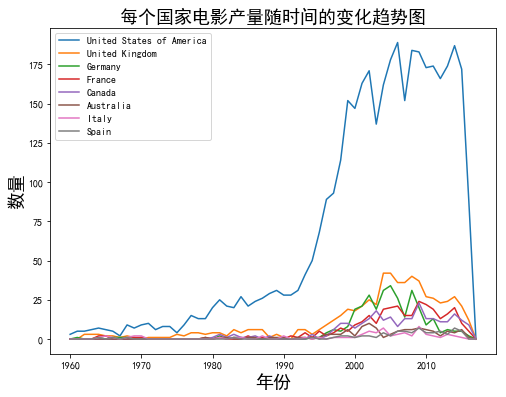

In [44]:
# 每个国家电影产量随时间的变化趋势图
# 从1960年之后开始算，取pie图中比例大于0.01的国家
cols = col.drop(['Other'])
countries_year60 = countries_year.loc[1960:, cols.index]
fig = plt.figure(figsize=(8, 6)) # 设置画图框尺寸
ax1 = plt.subplot(1, 1, 1)# 设置图的位置
plt.plot(countries_year60) #画折线图
# 设置图形格式
plt.title('每个国家电影产量随时间的变化趋势图', fontsize=18)
plt.xlabel('年份', fontsize=18)
plt.ylabel('数量', fontsize=18)
plt.xticks(range(1960, 2017, 10))# 设置x轴的刻度
plt.legend(countries_year60)
plt.show()

In [45]:
### 选出美国电影评分前20
# countries_df加入id,title,vote_average
countries_df['id'] = merge_df['id']
countries_df['title'] = merge_df['title']
countries_df['vote_average'] = merge_df['vote_average']
countries_df['vote_count'] = merge_df['vote_count']
# 删除评价人数小于100的电影
countries_df = countries_df[countries_df['vote_count'] > 100]
usa_vote = countries_df[countries_df['United States of America']==1][['id', 'title', 'vote_average']]
usa_vote['tagline'] = merge_df['tagline']
usa_vote['overview'] = merge_df['overview']
usa_vote.sort_values(by='vote_average', ascending=False).head(20)

,id,title,vote_average,tagline,overview
1881,278,The Shawshank Redemption,8.5,Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...
3337,238,The Godfather,8.4,An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o..."
662,550,Fight Club,8.3,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...
2731,240,The Godfather: Part II,8.3,"I don't feel I have to wipe everybody out, Tom...",In the continuing saga of the Corleone crime f...
1818,424,Schindler's List,8.3,"Whoever saves one life, saves the world entire.",The true story of how businessman Oskar Schind...
3865,244786,Whiplash,8.3,The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ..."
3232,680,Pulp Fiction,8.3,Just because you are a character doesn't mean ...,"A burger-loving hit man, his philosophical par..."
3719,510,One Flew Over the Cuckoo's Nest,8.2,"If he's crazy, what does that make you?",While serving time for insanity at a state men...
690,497,The Green Mile,8.2,Miracles do happen.,A supernatural tale set on death row in a Sout...
1847,769,GoodFellas,8.2,Three Decades of Life in the Mafia.,"The true story of Henry Hill, a half-Irish, ha..."


In [46]:
#按心情推荐对应类型的电影
sad_mood = genres_df[genres_df['Comedy']==1][['id', 'title', 'vote_average']]
sad_mood['genres'] = merge_df['genres']
sad_mood['tagline'] = merge_df['tagline']
sad_mood.sort_values(by='vote_average', ascending=False).head(10)
# or genres_df['Science fiction']==1 or genres_df['Family']==1 or genres_df['Fantasy']==1

,id,title,vote_average,genres,tagline
809,13,Forrest Gump,8.2,"Comedy,Drama,Romance","The world will never be the same, once you've ..."
3906,284,The Apartment,8.1,"Comedy,Drama,Romance","Movie-wise, there has never been anything like..."
4238,3082,Modern Times,8.1,"Drama,Comedy",He stands alone as the greatest entertainer of...
2285,105,Back to the Future,8.0,"Adventure,Comedy,Science Fiction,Family",He's the only kid ever to get into trouble bef...
77,150540,Inside Out,8.0,"Drama,Comedy,Animation,Family",Meet the little voices inside your head.
4173,935,Dr. Strangelove or: How I Learned to Stop Worr...,8.0,"Drama,Comedy,War",The hot-line suspense comedy
1532,120467,The Grand Budapest Hotel,8.0,"Comedy,Drama",A perfect holiday without leaving home.
3984,239,Some Like It Hot,8.0,"Comedy,Romance",The movie too HOT for words!
3526,9277,The Sting,7.9,"Comedy,Crime,Drama",...all it takes is a little confidence.
4216,3083,Mr. Smith Goes to Washington,7.9,"Comedy,Drama","Romance, drama, laughter and heartbreak... cre..."
